In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

In [3]:
def mfreqz(b, a):

    omega, h = signal.freqz(b,a)
    plt.plot(omega/np.pi, 20*np.log10(abs(h)))
    plt.grid()
    plt.title('Magnitude Response', fontsize=10)
    plt.xlabel('ω\π ', fontsize=10)
    plt.ylabel('Magnitude [dB]', fontsize=10)
    plt.show()
    
    return h
    
# Define impz(b,a) to calculate impulse response
# and step response of a system
# input: b= an array containing numerator coefficients,
# a= an array containing denominator coefficients
def impz(b, a):
	
	# Define the impulse sequence of length 60
	impulse = np.repeat(0., 100)
	impulse[0] = 1.
	x = np.arange(0, 100)

	# Compute the impulse response
	response = signal.lfilter(b, a, impulse)

	# Plot filter impulse and step response:
	fig = plt.figure(figsize=(10, 6))
	plt.subplot(211)
	plt.stem(x, response, 'm', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Impulse response', fontsize=15)

	plt.subplot(212)
	step = np.cumsum(response) # Compute step response of the system

	plt.stem(x, step, 'g', use_line_collection=True)
	plt.ylabel('Amplitude', fontsize=15)
	plt.xlabel(r'n (samples)', fontsize=15)
	plt.title(r'Step response', fontsize=15)
	plt.subplots_adjust(hspace=0.5)

	fig.tight_layout()
	plt.show()
    

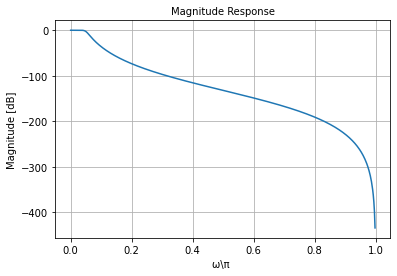

C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response, 'm', use_line_collection=True)
C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:38: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, step, 'g', use_line_collection=True)


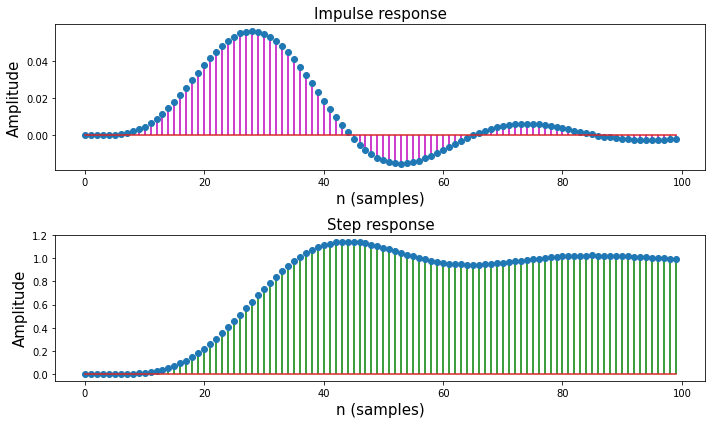

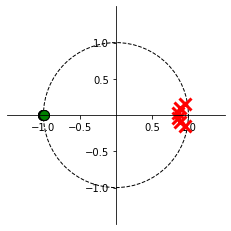

order:  6
coefficients alpha:  [  1.     -5.388  12.125 -14.585   9.888  -3.583   0.542]
coefficients beta:  [0. 0. 0. 0. 0. 0. 0.]
Poles:  [0.94875422+0.14637217j 0.94875422-0.14637217j 0.88840358+0.10033589j
 0.88840358-0.10033589j 0.85693233+0.0354245j  0.85693233-0.0354245j ]
second-order filter coefficients: 
[[ 1.83850871e-07  3.67701743e-07  1.83850871e-07  1.00000000e+00
  -1.71386465e+00  7.35587906e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.77680716e+00  7.99328215e-01]
 [ 1.00000000e+00  2.00000000e+00  1.00000000e+00  1.00000000e+00
  -1.89750845e+00  9.21559390e-01]]


In [4]:
#Butterworth

Wp = 0.0175;
Ws = 0.5 - Wp;
Rp = 13e-6;
Rs = 125;

N, Wn = signal.buttord(Wp, Ws, Rp, Rs)
b_butter, a_butter = signal.butter(N, Wn)
sos = signal.butter(N, Wn, output='sos')
h = mfreqz(b_butter, a_butter)
impz(b_butter, a_butter)
zeros, poles, k =zplane(b_butter, a_butter)
print("order: ", N)
print("coefficients alpha: ", np.round_(a_butter, decimals = 3))
print("coefficients beta: ", np.round_(b_butter, decimals = 3))
print("Poles: ", poles)
print("second-order filter coefficients: ")
print(sos)

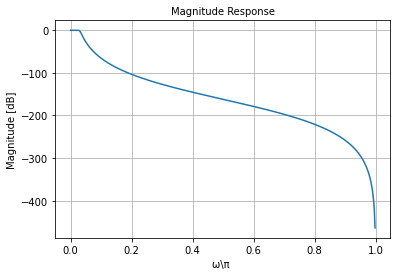

C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response, 'm', use_line_collection=True)
C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:38: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, step, 'g', use_line_collection=True)


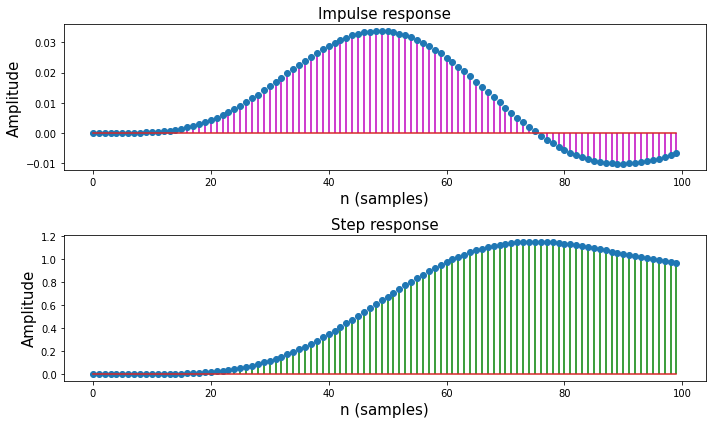

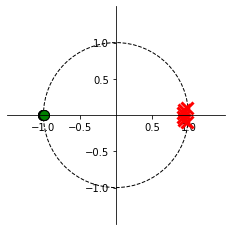

order:  6
coefficients alpha:  [  1.          -5.68452286  13.47605604 -17.05317486  12.14883926
  -4.61974462   0.73254746]
coefficients beta:  [6.67267090e-09 4.00360254e-08 1.00090063e-07 1.33453418e-07
 1.00090063e-07 4.00360254e-08 6.67267090e-09]
Poles:  [0.97506246+0.09210313j 0.97506246-0.09210313j 0.9424093 +0.06514487j
 0.9424093 -0.06514487j 0.92478967+0.0233912j  0.92478967-0.0233912j ]


In [5]:
#Cheb 1

Wp = 0.0175;
Ws = 0.5 - Wp;
Rp = 13e-6;
Rs = 125;

N, Wn = signal.cheb1ord(Wp, Ws, Rp, Rs)
b_cheb1, a_cheb1 = signal.cheby1(N, Rp, Wn)
h = mfreqz(b_cheb1, a_cheb1)
impz(b_cheb1, a_cheb1)
zeros, poles, k = zplane(b_cheb1, a_cheb1)
print("order: ", N)
print("coefficients alpha: ", a_cheb1)
print("coefficients beta: ", b_cheb1)
print("Poles: ", poles)

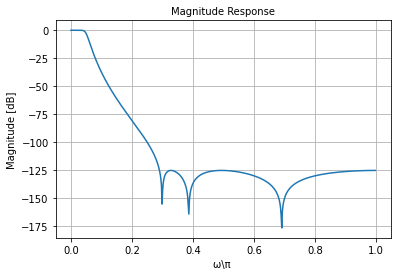

C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response, 'm', use_line_collection=True)
C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:38: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, step, 'g', use_line_collection=True)


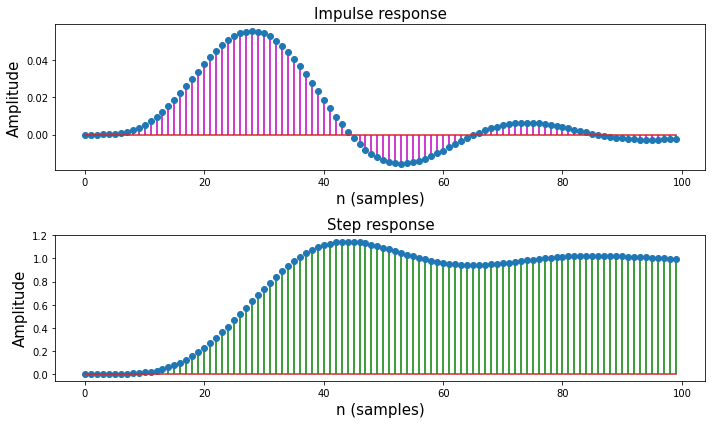

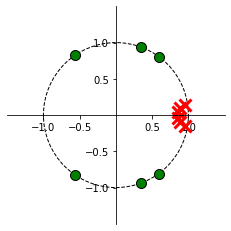

order:  6
coefficients alpha:  [  1.          -5.38914599  12.12953284 -14.59218575   9.89505088
  -3.58562464   0.54238448]
coefficients beta:  [ 3.54498912e-06 -2.66123745e-06  6.03831531e-06 -2.01626985e-06
  6.03831531e-06 -2.66123745e-06  3.54498912e-06]
Poles:  [0.94949983+0.14589205j 0.94949983-0.14589205j 0.88890572+0.10112641j
 0.88890572-0.10112641j 0.85616744+0.03606338j 0.85616744-0.03606338j]
second-order filter coefficients:  [[ 3.54498912e-06  4.00281758e-06  3.54498912e-06  1.00000000e+00
  -1.71233488e+00  7.34323256e-01]
 [ 1.00000000e+00 -7.00152229e-01  1.00000000e+00  1.00000000e+00
  -1.77781145e+00  8.00379937e-01]
 [ 1.00000000e+00 -1.17969981e+00  1.00000000e+00  1.00000000e+00
  -1.89899965e+00  9.22834413e-01]]


In [6]:
#Cheb 2

Wp = 0.0175;
Ws = 0.5 - Wp;
Rp = 13e-6;
Rs = 125;

N, Wn = signal.cheb2ord(Wp, Ws, Rp, Rs)
b_cheb2, a_cheb2 = signal.cheby2(N, Rs, Wn)
sos_cheb2 = signal.cheby2(N, Rs, Wn, output="sos")
h = mfreqz(b_cheb2, a_cheb2)
impz(b_cheb2, a_cheb2)
zeros, poles, k = zplane(b_cheb2, a_cheb2)
print("order: ", N)
print("coefficients alpha: ", a_cheb2)
print("coefficients beta: ", b_cheb2)
print("Poles: ", poles)
print("second-order filter coefficients: ", sos_cheb2)

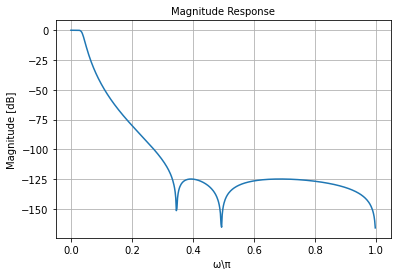

C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:30: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, response, 'm', use_line_collection=True)
C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\3594495930.py:38: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x, step, 'g', use_line_collection=True)


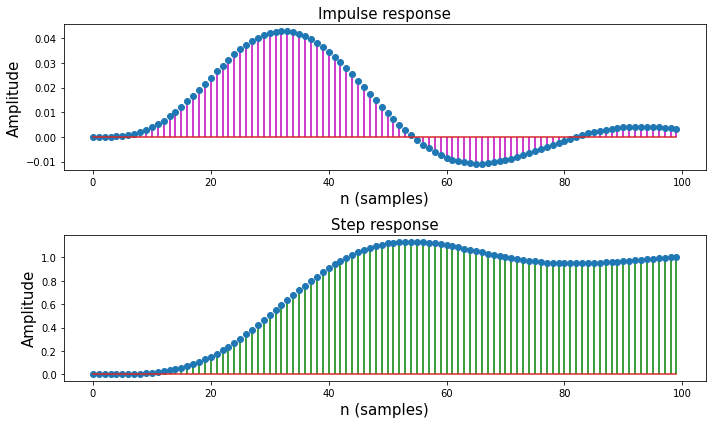

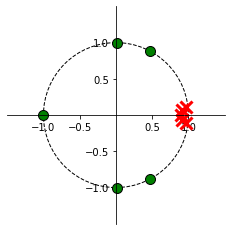

order:  5
coefficients alpha:  [ 1.         -4.65419998  8.6791025  -8.1051872   3.79033416 -0.71003417]
coefficients beta:  [3.64586015e-06 1.11997865e-07 3.89997014e-06 3.89997014e-06
 1.11997865e-07 3.64586015e-06]
Poles:  [0.96187872+0.10946376j 0.96187872-0.10946376j 0.91567053+0.06470226j
 0.91567053-0.06470226j 0.89910149+0.j        ]


In [7]:
#Ellips
Wp = 0.0175;
Ws = 0.5 - Wp;
Rp = 13e-6;
Rs = 125;

N, Wn = signal.ellipord(Wp, Ws, Rp, Rs)
b_ellip, a_ellip = signal.ellip(N, Rp, Rs, Wn)
h = mfreqz(b_ellip, a_ellip)
impz(b_ellip, a_ellip)
zeros, poles, k = zplane(b_ellip, a_ellip)
print("order: ", N)
print("coefficients alpha: ", a_ellip)
print("coefficients beta: ", b_ellip)
print("Poles: ", poles)

C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\2819771853.py:1: UserWarning: The filter's denominator is extremely small at frequencies [3.117, 3.123, 3.129, 3.135],             around which a singularity may be present
  w_butter, gd_butter = signal.group_delay((b_butter, a_butter))
C:\Users\JelleKomen\AppData\Local\Temp\ipykernel_38160\2819771853.py:2: UserWarning: The filter's denominator is extremely small at frequencies [3.105, 3.111, 3.117, 3.123, 3.129, 3.135],             around which a singularity may be present
  w_cheb1, gd_cheb1 = signal.group_delay((b_cheb1, a_cheb1))


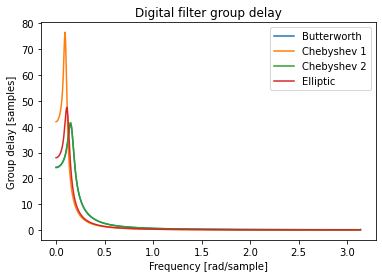

In [13]:
w_butter, gd_butter = signal.group_delay((b_butter, a_butter))
w_cheb1, gd_cheb1 = signal.group_delay((b_cheb1, a_cheb1))
w_cheb2, gd_cheb2 = signal.group_delay((b_cheb2, a_cheb2))
w_ellip, gd_ellip = signal.group_delay((b_ellip, a_ellip))

plt.title('Digital filter group delay')
plt.plot(w_butter, gd_butter, label = "Butterworth")
plt.plot(w_cheb1, gd_cheb1, label = "Chebyshev 1")
plt.plot(w_cheb2, gd_cheb2, label = "Chebyshev 2")
plt.plot(w_ellip, gd_ellip, label = "Elliptic")

plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.legend()
plt.show()

In [9]:
Fs = 10*pow(10, 6)
T = 1/Fs
Fsensor = 175*pow(10, 3)

print("The maximum delay in order to be BIBO stable for the controller is depended on the bandwidth of the sensor, which is", 1/Fsensor, "seconds")
print("Maximum Delays Filters")
print("Butterworth ", int(max(gd_butter)), "samples ", int(max(gd_butter))*T, "seconds")
print("Chebyshev 1 ", int(max(gd_cheb1)), "samples ", int(max(gd_cheb1))*T, "seconds")
print("Chebyshev 2 ", int(max(gd_cheb2)), "samples ", int(max(gd_cheb2))*T, "seconds")
print("Elliptic    ", int(max(gd_ellip)), "samples ", int(max(gd_ellip))*T, "seconds")


The maximum delay in order to be BIBO stable for the controller is depended on the bandwidth of the sensor, which is 5.7142857142857145e-06 seconds
Maximum Delays Filters
Butterworth  41 samples  4.1e-06 seconds
Chebyshev 1  76 samples  7.6e-06 seconds
Chebyshev 2  41 samples  4.1e-06 seconds
Elliptic     47 samples  4.7e-06 seconds


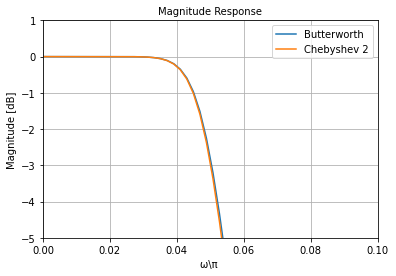

In [10]:
#Butterworth vs Chebyshev 2
omega_b, h_b = signal.freqz(b_butter,a_butter)
omega_c, h_c = signal.freqz(b_cheb2, a_cheb2)
plt.plot(omega_b/np.pi, 20*np.log10(abs(h_b)), label="Butterworth")
plt.plot(omega_c/np.pi, 20*np.log10(abs(h_c)), label="Chebyshev 2")
plt.axis([0, 0.1, -5, 1])
plt.grid()
plt.title('Magnitude Response', fontsize=10)
plt.xlabel('ω\π ', fontsize=10)
plt.ylabel('Magnitude [dB]', fontsize=10)
plt.legend()
plt.show()

In [11]:
#Since butterworth magnitude goes to 0 since lim w -> inf |Magn| = 0, therefore butterworth is more ideally in this scenario because lower the magniute is better for the snr.

print("alpha ", a_butter)
print("beta", b_butter)

alpha  [  1.          -5.38818026  12.12526175 -14.58462191   9.88834453
  -3.58264731   0.54185496]
beta [1.83850871e-07 1.10310523e-06 2.75776307e-06 3.67701743e-06
 2.75776307e-06 1.10310523e-06 1.83850871e-07]
